# K-means ++
1. Take one center c1, chosen uniformly at random X
2. Take an new center ci, choosing x e X with probability Dx^2/(summe Dx^2) 
3. Repeat step 2 until we have taken k centers altogether
4. Proceed as with the standard  k-means algorthm


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [2]:
#Datensatz mit 2 Spalten und n Zeilen zufällig generieren
n_samples=10
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.70488779 0.78138705]
 [0.3252165  0.42910207]
 [0.69589734 0.56159136]
 [0.0712853  0.80468934]
 [0.0806616  0.38700461]
 [0.82841807 0.35889804]
 [0.75418922 0.28150034]
 [0.96710361 0.88407552]
 [0.88039967 0.70210522]
 [0.48234919 0.24817141]]


0.9671036125338163

In [3]:
data.shape

(10, 2)

In [4]:
f1=data[0:((n_samples)), 0]

In [5]:
f2=data[0:((n_samples)),1]

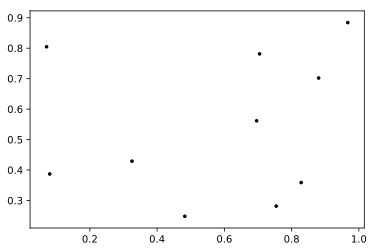

In [6]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [7]:
xAchsemax= f1.max()
xAchsemin = f1.min()
yAchsemax = f2.max()
yAchsemin = f2.min()


# Step 1
Take one center c1, chosen uniformly at random from X

In [8]:
C = np.random.random((1,2))


cx1= C[0:((1)),0]
cy1 = C[0:((1)),1]

In [9]:
print (C)

[[0.9299117  0.19793007]]


In [69]:
C.shape

(1, 2)

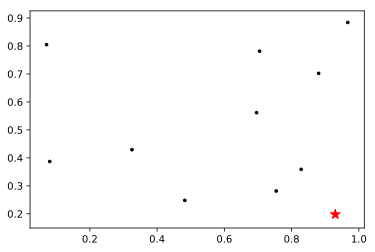

In [10]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

# Step 2: 
Take a new center ci choosing xEX with probability (D(x)^2)/(Summe D(x)^2)

D(x) denote the shortest distance from a data point to the closest center we have already chosen

Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2


https://msdn.microsoft.com/de-de/magazine/mt185575.aspx

https://stackoverflow.com/questions/5466323/how-exactly-does-k-means-work

Wichtig Bei Schleife nur Distanz zum nächst liegenden Cluster wichtig

--> siehe k-means


In [11]:
diff = X-C
print (diff)

[[-0.22502392  0.58345699]
 [-0.6046952   0.23117201]
 [-0.23401436  0.3636613 ]
 [-0.85862641  0.60675927]
 [-0.84925011  0.18907455]
 [-0.10149363  0.16096797]
 [-0.17572248  0.08357028]
 [ 0.03719191  0.68614546]
 [-0.04951204  0.50417516]
 [-0.44756252  0.05024134]]


In [12]:
dist = np.linalg.norm(

        diff, # Apply norm on differences

        axis=1 # Apply ONLY along axis 1 (left->right, i.e. the coordinates of each point)

    )



print(f"\nDistances of X to centroid {C}:")

print(dist) 


Distances of X to centroid [[0.9299117  0.19793007]]:
[0.62534616 0.64737685 0.43244914 1.0513782  0.87004306 0.19029358
 0.19458258 0.6871527  0.50660047 0.45037362]


In [13]:
#quadrierter Abstand
dist_2 = (dist)**2
print (dist_2)

[0.39105782 0.41909678 0.18701226 1.10539612 0.75697493 0.03621165
 0.03786238 0.47217883 0.25664403 0.2028364 ]


In [14]:
#P-Verteilung
prob = (dist_2)/ sum (dist_2)
print (prob)

[0.10117216 0.10842623 0.0483827  0.28598152 0.19584006 0.00936846
 0.00979553 0.1221593  0.06639742 0.05247663]


In [15]:
#Funktion mit der wahrscheinlichkeit von prob den zugehörigen Wert aus X als neues Center zunehmen
# -> weighted Probability distribution

In [16]:
data_2 = pd.DataFrame(X)
data_2

,0,1
0,0.704888,0.781387
1,0.325217,0.429102
2,0.695897,0.561591
3,0.071285,0.804689
4,0.080662,0.387005
5,0.828418,0.358898
6,0.754189,0.281500
7,0.967104,0.884076
8,0.880400,0.702105
9,0.482349,0.248171


In [17]:
# Convert wide table to long table. Note: DataFrame.reset_index() creates a new column from the tables row indes.

data_long = data_2.reset_index().melt(id_vars="index")
data_long

,index,variable,value
0,0,0,0.704888
1,1,0,0.325217
2,2,0,0.695897
3,3,0,0.071285
4,4,0,0.080662
5,5,0,0.828418
6,6,0,0.754189
7,7,0,0.967104
8,8,0,0.880400
9,9,0,0.482349


In [18]:
a = np.array(data_long)
print (a)

[[0 0 0.7048877871915469]
 [1 0 0.32521650283384085]
 [2 0 0.6958973410658146]
 [3 0 0.07128529666230243]
 [4 0 0.08066159598537737]
 [5 0 0.8284180699030514]
 [6 0 0.7541892209534772]
 [7 0 0.9671036125338163]
 [8 0 0.8803996675398604]
 [9 0 0.4823491862009349]
 [0 1 0.781387051452977]
 [1 1 0.42910207270769496]
 [2 1 0.561591363598138]
 [3 1 0.8046893398913059]
 [4 1 0.38700461092667116]
 [5 1 0.358898037385462]
 [6 1 0.281500343203834]
 [7 1 0.884075524893533]
 [8 1 0.7021052239695035]
 [9 1 0.2481714069655795]]


In [26]:
a.shape

(20, 3)

In [19]:
data_long.shape

(20, 3)

In [27]:
index =a[0:n_samples,0]
print(index)

[0 1 2 3 4 5 6 7 8 9]


In [21]:
from random import choice
z=np.random.choice(index, p=prob)
print (z)

3


https://www.python-kurs.eu/python_numpy_wahrscheinlichkeit.php

https://eli.thegreenplace.net/2010/01/22/weighted-random-generation-in-python

im Internet dazu gefunden --> muss noch angepasst werden

from numpy.random import choice

draw = choice(list_of_candidates, number_of_items_to_pick, 

                        p=probability_distribution)

In [22]:
#aus Index neuen Datenpunkt auswählen
#Also in etwa so random_x = X[np.random.choice(X)]

*Zitat von Alex*

Den vektor p bekommt ihr aus den Distanzen D aller datenpunkte aus X zum am nächsten liegenden centroid, also einfach für jedes x den kleinsten Wert aus D. Dafür könnt ihr zB np.min verwenden. Das quadriert ihr dann und teilt den vektor durch seine eigene Summe, was euch dann die Wahrscheinlichkeitkeiten für p gibt.

np.random.choice ist genau richtig für diesen Zweck. Die Funktion gibt euch aber keinen Datenpunkt zurück, sondern einen Index dafür, mit dem ihr dann den Datenpunkt aus X auswählt. (bearbeitet)

Also in etwa so random_x = X[np.random.choice(X)]


In [23]:
#Koordinaten für das neue Center
c_neu=data[z]
print (c_neu)

[0.0712853  0.80468934]


## for-Schleife
for Variable in Sequenz:
    
	Anweisung1
	Anweisung2
	...
	Anweisung

In [42]:
#number for clusters --> kann varriert werden je nachdem wie viel man will
# anzahl wie oft die schleife durchlaufen werden soll
k=2

In [41]:
# array mit neuen center die generiert werden
#cx1= C[0:((k)),0]
#cy1 = C[0:((k)),1]



#C = np.array(list(zip(cx1, cy1)), dtype=np.float32)
#print (C)


neue Center *c_neu* müssen zum bestehenden array *C* hinzugefügt werden


_Zitat_

Eine weiteres, relativ häufiges Problem ist es, weitere Elemente zu einer bestehenden Liste hinzuzufügen. (Das funktioniert nur bei Listen, nicht bei Arrays.) Dafür verwendest du die Methode append deines Listenobjekts.

liste = list(range(3,7))

liste.append(8)

https://www.physik.uzh.ch/local/teaching/PHY114/python/python-listen.php


In [57]:
#alter arry in liste umwandeln damit ein Wert hinzugefügt werden kann
cl = np.ndarray.tolist(C)
print (cl)

[[0.929911703824401, 0.19793006547308956]]


In [59]:
c_neul = np.ndarray.tolist (c_neu)
print (c_neul)

[0.07128529666230243, 0.8046893398913059]


In [60]:
#Liste der Center wurde mit den Koordinaten des neuen centers erweitert
cl.append (c_neul)
print (cl)

[[0.929911703824401, 0.19793006547308956], [0.07128529666230243, 0.8046893398913059]]


In [62]:
#Liste der Center wieder in array umwandeln damit, damit gearbeiter werden kann
c_alle = np.array(cl)
print (c_alle)

[[0.9299117  0.19793007]
 [0.0712853  0.80468934]]


In [64]:
cx1= c_alle[0:((k)),0]
cy1 = c_alle[0:((k)),1]

In [68]:
c_alle.shape

(2, 2)

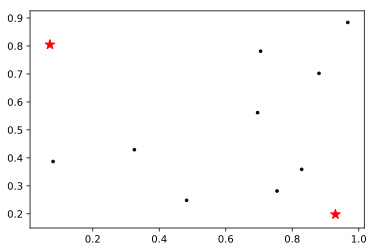

In [65]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

In [82]:
#Distanzen aller Punkte von X zum nächstliegenden Center berechnen
# nächstliegend --> min-funktion
#Wie bekomme ich alle distanzen in ein Array?
#distanz wieder nach alex prinzip berechnen sonst klappen die späteren Schritte nicht mehr

for i in range(len(X)):
     distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
     print(distances)

[0.62534616 0.63403085]
[0.64737685 0.45337275]
[0.43244914 0.67025132]
[1.0513782 0.       ]
[0.87004306 0.41778996]
[0.19029358 0.87862388]
[0.19458258 0.86028164]
[0.6871527  0.89932898]
[0.50660047 0.81559154]
[0.45037362 0.69187118]


In [83]:
# nächster Zentroid eines Datenpunktes -> z.B. erster Datenpunkt liegt am nächsten am dritten Zentroid
for i in range(len(X)):
        distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
        cluster = np.argmin(distances)
        print(cluster)

0
1
0
1
1
0
0
0
0
0


In [85]:
# Datenpunkte hier noch keinem Cluster zugeordnet
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [86]:
#Datenpunkte in Cluser eingeteilt -> zugehöriger array erstellt
for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
